## What will you learn from this project?
* Bivariate Analysis
* Sunburst and World Map Charts
* Comparison of Features
* Exploratory Data Analysis (EDA)

## Introduction
* **The Space Race** was a 20th-century competition between two Cold War adversaries, the Soviet Union (USSR) and the United States (US), to achieve superior spaceflight capability.
* It had its origins in the ballistic missile-based nuclear arms race between the two nations following World War II.
* The technological advantage demonstrated by spaceflight achievement was seen as necessary for national security, and became part of the symbolism and ideology of the time. The Space Race brought pioneering launches of artificial satellites, robotic space probes to the Moon, Venus, and Mars, and human spaceflight in low Earth orbit and ultimately to the Moon.
* 4 October 1957: The USSR successfully launches Sputnik 1, the first Earth-orbiting satellite in history. 3 November 1957: The USSR successfully launches Sputnik 2, carrying a dog named Laika into space. They become the first nation to successfully send a living organism into orbit.
* Detailed Information: https://nextspaceflight.com/launches/past/?search=
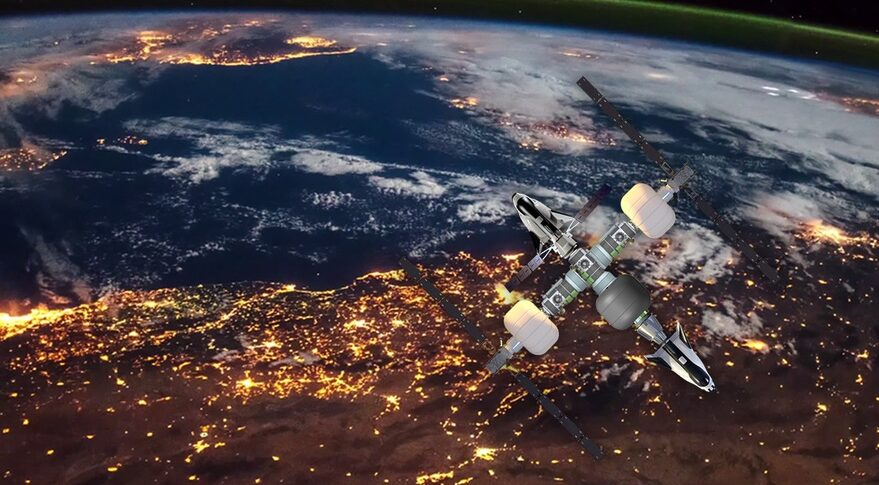

## Analysis Content
1. [Python Libraries](#1)
1. [Data Content](#2)
1. [Read and Analyze Data](#3)
1. [Number of Launches by Every Company](#4)
1. [Rocket Status](#5)
1. [Mission Status](#6)
1. [Rocket Cost Distribution with Rocket Status](#7)
1. [Rocket Cost Distribution with Mission Status](#8)
1. [Total Spent Money for each Companies](#9)
1. [Mission Numbers by Year](#10)
1. [Countries and Mission Status](#11)
1. [Sunburst Chart Analysis](#12)
1. [Status Mission by Countries in World Map](#13)

<a id=1></a>
## Python Libraries

In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt

from iso3166 import countries

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

from sklearn.preprocessing import LabelEncoder

import warnings
warnings.filterwarnings("ignore")

## Data Content
* **Company Name:** Company
* **Location:** Location of the Launch
* **Datum:** Datum and Time of Launch
* **Detail:** Rocket Name
* **Status Rocket:** Status of the rocket
* **Rocket:** Cost of the mission: in $ million
* **Status Mission:** Status of the mission

<a id=3></a>
## Read and Analyze Data

In [ ]:
df = pd.read_csv("/kaggle/input/all-space-missions-from-1957/Space_Corrected.csv")
df.head()

In [ ]:
df = df.drop(['Unnamed: 0', 'Unnamed: 0.1'], axis = 1)
df.head()

In [ ]:
df.describe()

In [ ]:
df.info()

<a id=4></a>
## Number of Launches by Every Company

In [ ]:
ds = df["Company Name"].value_counts().reset_index()[:28]
ds

In [ ]:
fig = go.Figure(go.Bar(x = ds["index"],
                       y = ds["Company Name"],
                       marker = dict( color = ds["Company Name"],
                                    colorscale = "bluered")))
fig.update_layout(title = "Number of Launches by Every Company", xaxis_title = "Top 28 Country", yaxis_title = "count", hovermode = "x")
fig.show()

<a id=5></a>
## Rocket Status

In [ ]:
ds = df["Status Rocket"].value_counts().reset_index()
ds

In [ ]:
fig = px.pie(ds, values = "Status Rocket", names = "index", title = "Rocket Status")
fig.show()

<a id=6></a>
## Mission Status

In [ ]:
ds = df["Status Mission"].value_counts().reset_index()[:3]
ds

In [ ]:
fig = px.bar(ds, x = "index", y = "Status Mission", title = "Mission Status")
fig.show()

<a id=7></a>
## Rocket Cost Distribution with Rocket Status

In [ ]:
np.sum(pd.isna(df.loc[:," Rocket"]))

In [ ]:
df_ = df.dropna(subset=[" Rocket"], axis = "rows")
len(df_)

In [ ]:
np.sum(pd.isna(df_.loc[:," Rocket"]))

In [ ]:
df_.loc[:, " Rocket"]

In [ ]:
df_.loc[:, " Rocket"] = df_.loc[:, " Rocket"].fillna(0.0).str.replace(",","")
df_.loc[:, " Rocket"] = df_.loc[:, " Rocket"].astype(np.float64).fillna(0.0)

In [ ]:
df_d = df_[df_.loc[:, " Rocket"]<1000]
plt.figure(figsize = (22,6))
sns.histplot(data = df_d, x = " Rocket", hue = "Status Rocket")
plt.show()

<a id=8></a>
## Rocket Cost Distribution with Mission Status

In [ ]:
np.sum(pd.isna(df.loc[:,"Status Mission"]))

In [ ]:
plt.figure(figsize = (22,6))
sns.histplot(data = df_d, x = " Rocket", hue = "Status Mission")
plt.show()

<a id=9></a>
## Total Spent Money for each Companies

In [ ]:
df_.head()

In [ ]:
df_money = df_.groupby(["Company Name"])[" Rocket"].sum().reset_index()
df_money = df_money[df_money[" Rocket"] > 0]
df_money.head()

In [ ]:
df_money_ = df_money.sort_values(by = [" Rocket"], ascending = False)[:15]
df_money_.head()

In [ ]:
fig = px.bar(df_money_, x = "Company Name", y = " Rocket", title = "Total Spent Money for each Company")
fig.show()

<a id=10></a>
## Mission Numbers by Year

In [ ]:
df["date"] = pd.to_datetime(df["Datum"])
df.head()

In [ ]:
df["year"] = df["date"].apply(lambda datetime: datetime.year)
df.head()

In [ ]:
ds = df["year"].value_counts().reset_index()
ds

In [ ]:
fig = px.bar(ds, x = "index", y = "year", title = "Missions Number by Year")
fig.show()

<a id=11></a>
## Countries and Mission Status

In [ ]:
encoder = LabelEncoder()
encoder.fit(df["Status Mission"])
encoder

In [ ]:
colors = {0: "red", 
          1 : "Orange", 
          2 : "Yellow", 
          3 : "Green"}
colors

In [ ]:
countries_dict = {
    'Russia' : 'Russian Federation',
    'New Mexico' : 'USA',
    "Yellow Sea": 'China',
    "Shahrud Missile Test Site": "Iran",
    "Pacific Missile Range Facility": 'USA',
    "Barents Sea": 'Russian Federation',
    "Gran Canaria": 'USA'
}
df["country"] = df["Location"].str.split(", ").str[-1].replace(countries_dict)
df.head()

In [ ]:
fig = make_subplots(rows = 4, cols = 4, subplot_titles = df["country"].unique())
for i, country in enumerate(df["country"].unique()):
    counts = df[df["country"] == country]["Status Mission"].value_counts(normalize = True)*100
    color = [colors[x] for x in encoder.transform(counts.index)]
    trace = go.Bar(x = counts.index, y = counts.values, name = country, marker = {"color" : color}, showlegend = False)
    fig.add_trace(trace, row = (i//4) + 1, col = (i%4)+1)
fig.update_layout(title = {"text":"Countries and Mission Status"}, height = 1000, width = 1100)
for i in range(1,5):
    fig.update_yaxes(title_text = "Percentage", row = i, col = 1)
fig.show()

<a id=12></a>
## Sunburst Chart Analysis

In [ ]:
sun = df.groupby(["country","Company Name","Status Mission"])["Datum"].count().reset_index()
sun.head()

In [ ]:
sun = sun[(sun.country == "USA") | (sun.country == "China") | (sun.country == "Russian Federation") | (sun.country == "France")]
sun.head()

In [ ]:
fig = px.sunburst(sun, path = ["country", "Company Name", "Status Mission"], values = "Datum", title = "Sunburst Chart for some Countries")
fig.show()

<a id=13></a>
## Status Mission by Countries in World Map

In [ ]:
country_dict = dict()
for c in countries:
    country_dict[c.name] = c.alpha3
df["alpha3"] = df["country"]
df = df.replace({
    "alpha3":country_dict
})
df.loc[df["country"]== "North Korea","alpha3"] = "PRK"
df.loc[df["country"]== "South Korea","alpha3"] = "KOR"
df.head()

In [ ]:
mapdf = df.groupby(["country","alpha3"])["Status Mission"].count().reset_index()
mapdf.head()

In [ ]:
fig = px.choropleth(mapdf, locations = "alpha3", hover_name = "country", color = "Status Mission", title ="Status Mission by Countries")
fig.show()